In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics 

In [5]:
data = pd.read_csv(r"C:\Users\MYPC\Downloads\gld_price_data.csv")

In [7]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [11]:
data.sample(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
1130,2/21/2013,1502.420044,152.619995,33.430000,27.730000,1.327316
1033,9/19/2012,1461.050049,171.740005,34.119999,33.570000,1.305824
646,12/20/2010,1247.079956,135.110001,38.049999,28.709999,1.316500
1654,7/2/2015,2076.780029,111.760002,18.930000,14.950000,1.108697
576,8/26/2010,1047.219971,120.959999,32.619999,18.590000,1.270648


In [13]:
print("The number of rows: " , data.shape[0] ," The number of columns: ", data.shape[1])

The number of rows:  2290  The number of columns:  6


In [15]:
data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [19]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [21]:
data.duplicated().any()

False

In [23]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [27]:
correlation = data.select_dtypes(include=[float, int]).corr()


<Axes: >

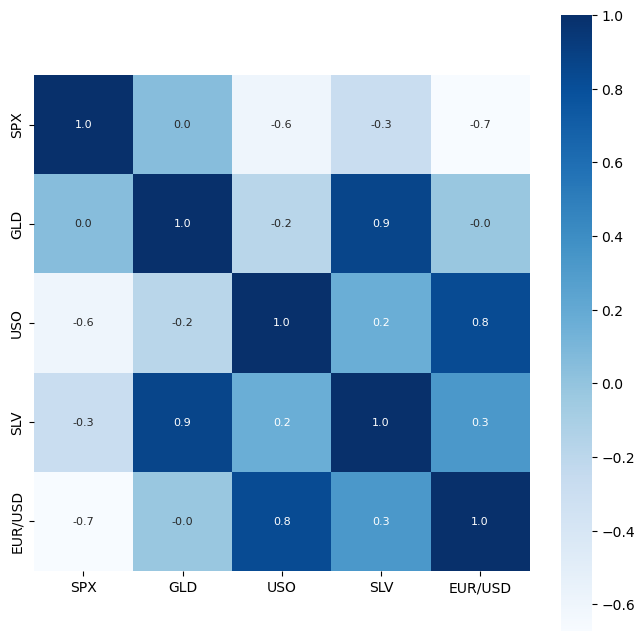

In [29]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [31]:
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\MYPC\AppData\Local\Temp\ipykernel_9904\2593926889.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'],color='gold')


<Axes: xlabel='GLD', ylabel='Density'>

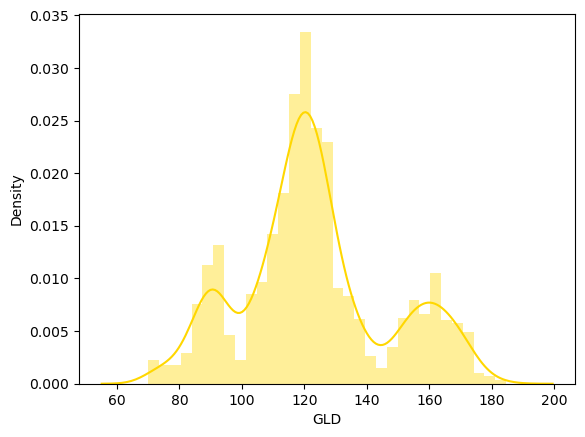

In [39]:
sns.distplot(data['GLD'],color='gold')

In [41]:
X = data.drop(['Date','GLD'], axis = 1)
y = data["GLD"]

In [44]:
X_train , X_test, y_train , y_test = train_test_split(X ,y , test_size = 0.2 , random_state = 4)

In [46]:
regressor = RandomForestRegressor(n_estimators = 100)

In [48]:
regressor.fit(X_train , y_train)

RandomForestRegressor()

In [50]:
test_data_regressor = regressor.predict(X_test)

In [52]:
error_score = metrics.r2_score(y_test , test_data_regressor)
print("the R squared error is: ", error_score)

the R squared error is:  0.990205466643678


In [58]:
y_test= list(y_test)

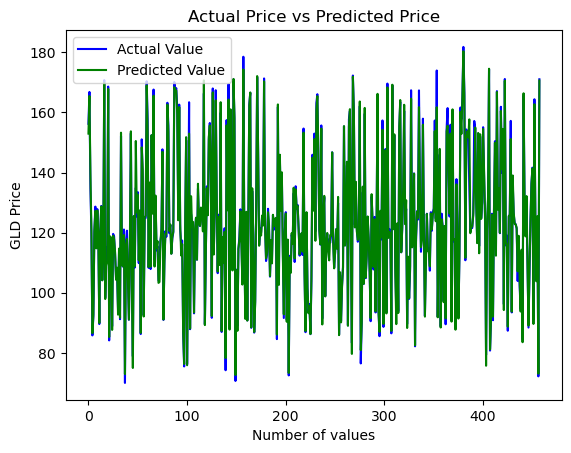

In [60]:
#Compare the actual values with the predicted values in a plot: 
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_regressor, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()